In [34]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Loading dataset

In [17]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url)
df.columns =['No_pregnant', 'Plasma_glucose', 'Blood_pres', 'Skin_thick', 
             'Serum_insu', 'BMI', 'Diabetes_func', 'Age', 'Class']
df.head()

,No_pregnant,Plasma_glucose,Blood_pres,Skin_thick,Serum_insu,BMI,Diabetes_func,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [35]:
df['Class'].value_counts()

0    500
1    267
Name: Class, dtype: int64

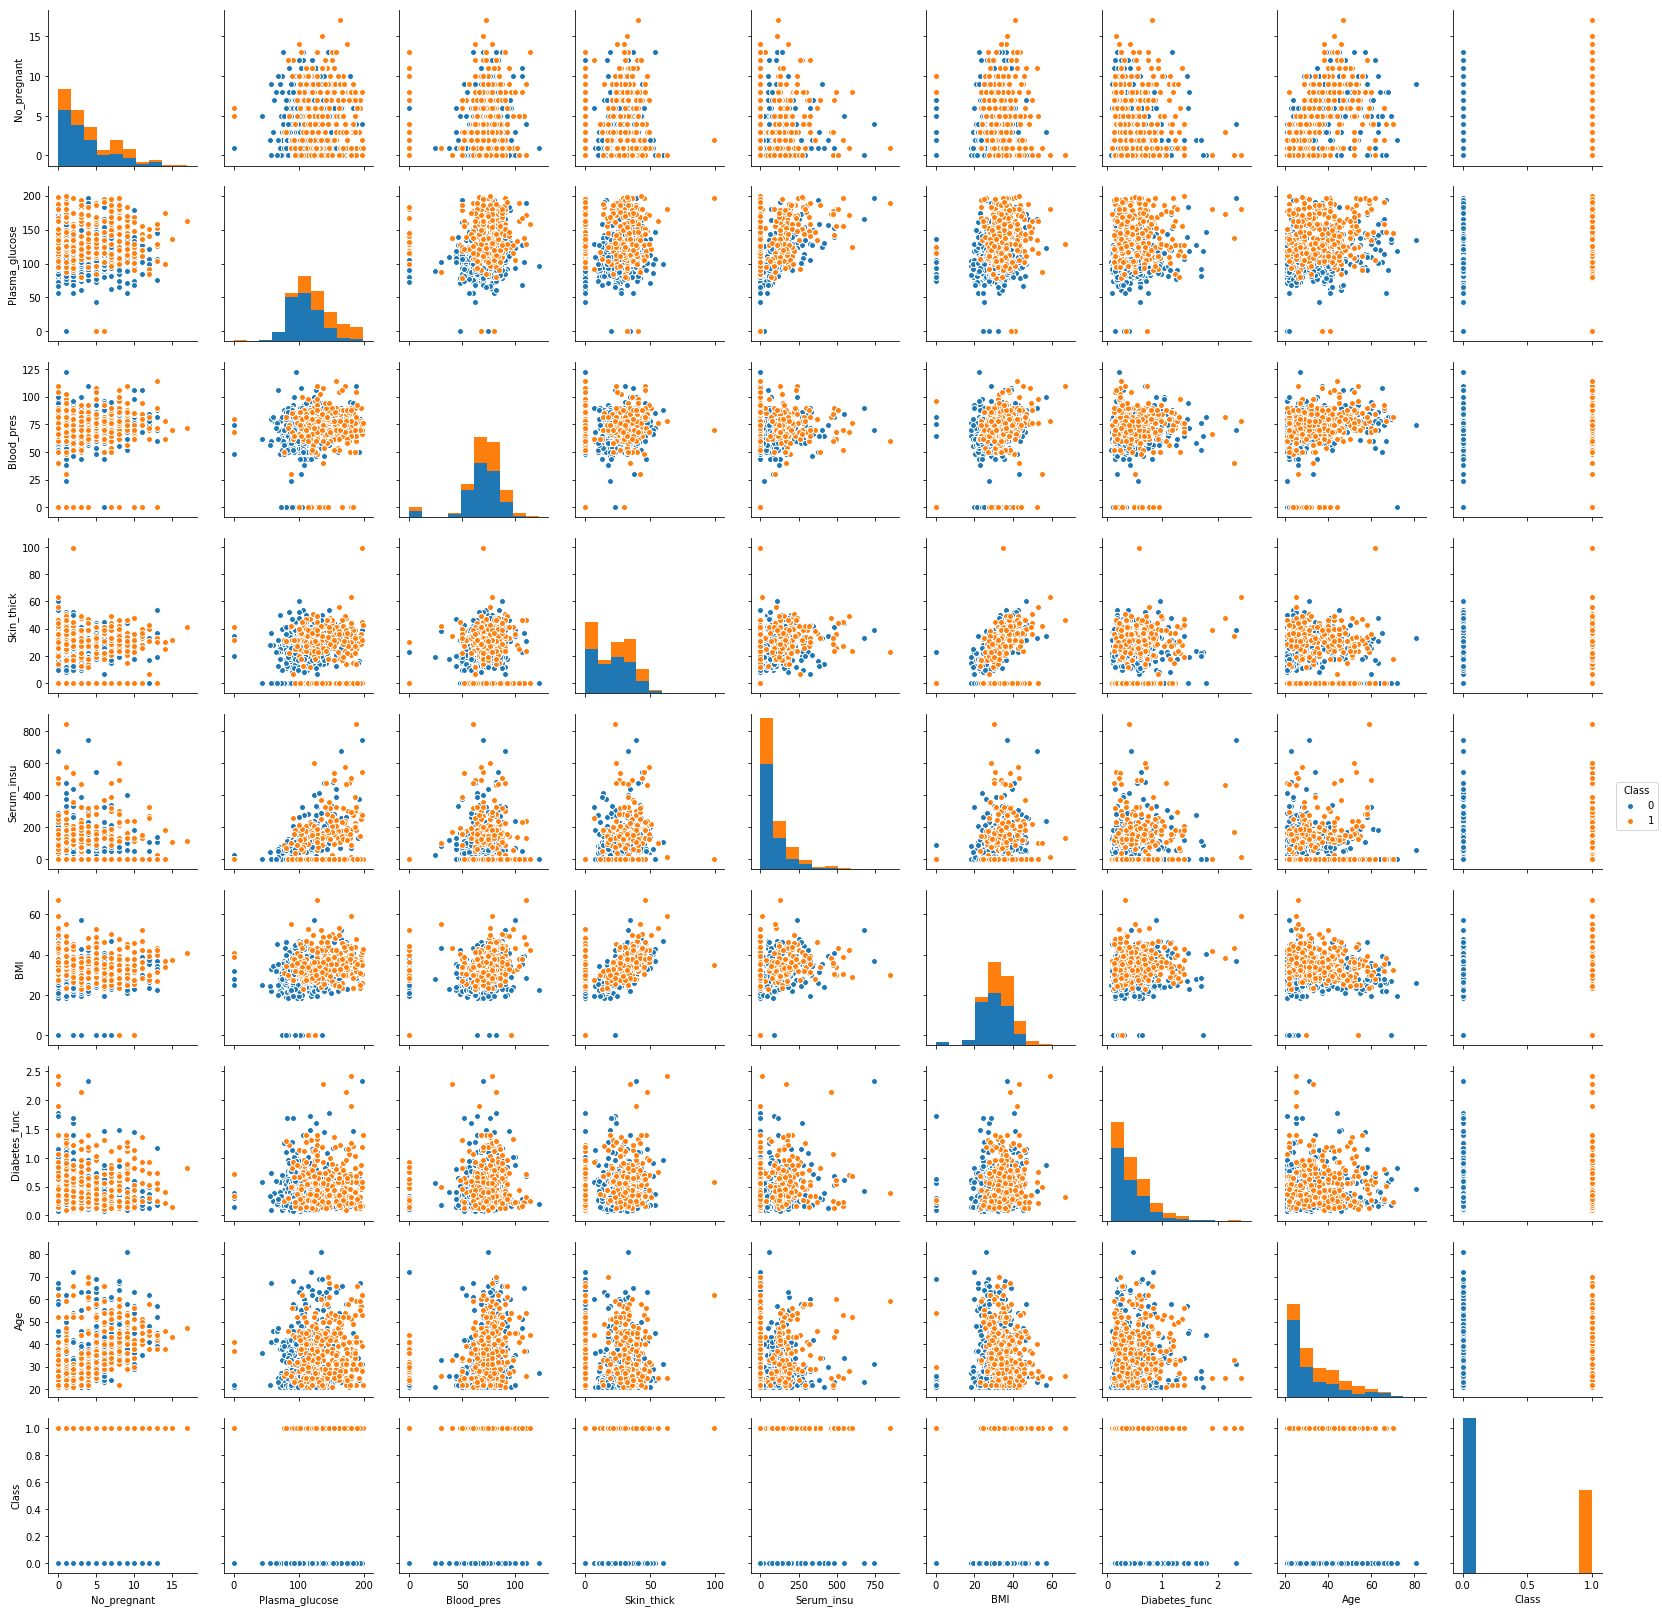

In [36]:
import seaborn as sns

sns.pairplot(df,hue='Class')

## Train Test Split 


In [21]:
X = df.drop('Class',axis=1)
y = df['Class']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (613, 8) (613,)
Test set: (154, 8) (154,)


## Using K Nearest Neighbor Classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [27]:
score = cross_val_score(knn,X, y,cv=10).mean()
score

0.6806390977443609

In [28]:
accuracy_rate = []

# Will take some time
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X, y,cv=10)
    accuracy_rate.append(score.mean())

Text(0,0.5,'Accuracy Rate')

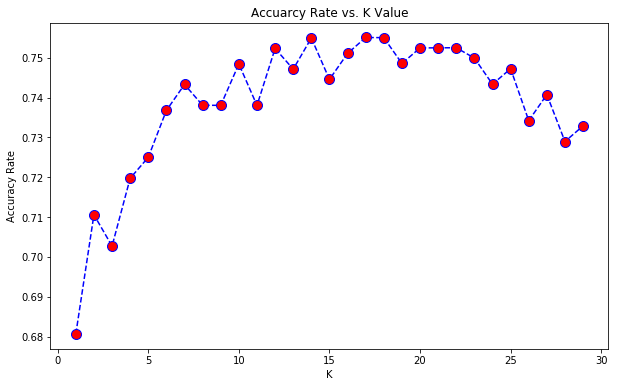

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuarcy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [30]:
print( "The best accuracy was with", max(accuracy_rate), "with k=", accuracy_rate.index(max(accuracy_rate)) ) 

The best accuracy was with 0.7550922761449078 with k= 16


In [31]:
# NOW WITH K=16
knn_16 = KNeighborsClassifier(n_neighbors=16)

knn_16.fit(X_train,y_train)
pred = knn_16.predict(X_test)
score_16=cross_val_score(knn_16,X, y,cv=10)
score_16.mean()

0.7510765550239235

In [32]:
import pickle
filename = 'final_knn.sav'
pickle.dump(knn_16, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7402597402597403
